<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n250.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.737718,92.828808,59.243891,61.668281,11615.555974,11908.034673,-1459.640006,13367.674679
1,0.0,1.0,69.630268,70.755360,77.501042,91.935620,877.395182,1197.217472,-651.663700,1848.881171
2,0.0,2.0,56.513710,60.897510,54.618269,76.598046,736.775632,995.403168,-369.976732,1365.379900
3,0.0,3.0,95.119549,60.843919,20.969508,67.653318,1866.231917,2120.818212,480.576206,1640.242006
4,0.0,4.0,87.071050,26.065651,92.675782,30.652434,46.333242,292.798160,465.851821,-173.053661
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,63.719689,61.408748,45.794736,47.059127,748.778715,976.761015,743.032217,233.728798
119996,999.0,116.0,67.860467,20.638538,53.135013,50.524805,607.719964,809.878786,663.812767,146.066018
119997,999.0,117.0,54.194913,93.214640,58.339739,91.123440,-9542.344885,-9235.472152,555.315328,-9790.787480
119998,999.0,118.0,89.429694,91.066219,88.251081,42.331180,1128.990988,1450.069163,-1515.435306,2965.504469


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.737718,92.828808,59.243891,61.668281,11615.555974,11908.034673,-1459.640006,13367.674679
1,0.0,1.0,69.630268,70.755360,77.501042,91.935620,877.395182,1197.217472,-651.663700,1848.881171
2,0.0,2.0,56.513710,60.897510,54.618269,76.598046,736.775632,995.403168,-369.976732,1365.379900
3,0.0,3.0,95.119549,60.843919,20.969508,67.653318,1866.231917,2120.818212,480.576206,1640.242006
4,0.0,4.0,87.071050,26.065651,92.675782,30.652434,46.333242,292.798160,465.851821,-173.053661
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,63.719689,61.408748,45.794736,47.059127,748.778715,976.761015,743.032217,233.728798
119996,999.0,116.0,67.860467,20.638538,53.135013,50.524805,607.719964,809.878786,663.812767,146.066018
119997,999.0,117.0,54.194913,93.214640,58.339739,91.123440,-9542.344885,-9235.472152,555.315328,-9790.787480
119998,999.0,118.0,89.429694,91.066219,88.251081,42.331180,1128.990988,1450.069163,-1515.435306,2965.504469


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    68.737718  92.828808  59.243891  61.668281  11615.555974   
      1.0    69.630268  70.755360  77.501042  91.935620    877.395182   
      2.0    56.513710  60.897510  54.618269  76.598046    736.775632   
      3.0    95.119549  60.843919  20.969508  67.653318   1866.231917   
      4.0    87.071050  26.065651  92.675782  30.652434     46.333242   
...                ...        ...        ...        ...           ...   
999.0 115.0  63.719689  61.408748  45.794736  47.059127    748.778715   
      116.0  67.860467  20.638538  53.135013  50.524805    607.719964   
      117.0  54.194913  93.214640  58.339739  91.123440  -9542.344885   
      118.0  89.429694  91.066219  88.251081  42.331180   1128.990988   
      119.0  40.225005  89.719465  76.076959  75.665096  -2474.448371   

                        Y        y_hat         e_hat  
rep   index                                           
0.0   0.0    11908.034673 -1459.640006  13367.674679  
      1.0     1197.217472  -651.663700   1848.881171  
      2.0      995.403168  -369.976732   1365.379900  
      3.0     2120.818212   480.576206   1640.242006  
      4.0      292.798160   465.851821   -173.053661  
...                   ...          ...           ...  
999.0 115.0    976.761015   743.032217    233.728798  
      116.0    809.878786   663.812767    146.066018  
      117.0  -9235.472152   555.315328  -9790.787480  
      118.0   1450.069163 -1515.435306   2965.504469  
      119.0  -2182.761846  -124.456469  -2058.305377  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    68.737718  92.828808  59.243891  61.668281  11615.555974   
      1.0    69.630268  70.755360  77.501042  91.935620    877.395182   
      2.0    56.513710  60.897510  54.618269  76.598046    736.775632   
      3.0    95.119549  60.843919  20.969508  67.653318   1866.231917   
      4.0    87.071050  26.065651  92.675782  30.652434     46.333242   
...                ...        ...        ...        ...           ...   
999.0 115.0  63.719689  61.408748  45.794736  47.059127    748.778715   
      116.0  67.860467  20.638538  53.135013  50.524805    607.719964   
      117.0  54.194913  93.214640  58.339739  91.123440  -9542.344885   
      118.0  89.429694  91.066219  88.251081  42.331180   1128.990988   
      119.0  40.225005  89.719465  76.076959  75.665096  -2474.448371   

                        Y        y_hat         e_hat  
rep   index                                           
0.0   0.0    11908.034673 -1459.640006  13367.674679  
      1.0     1197.217472  -651.663700   1848.881171  
      2.0      995.403168  -369.976732   1365.379900  
      3.0     2120.818212   480.576206   1640.242006  
      4.0      292.798160   465.851821   -173.053661  
...                   ...          ...           ...  
999.0 115.0    976.761015   743.032217    233.728798  
      116.0    809.878786   663.812767    146.066018  
      117.0  -9235.472152   555.315328  -9790.787480  
      118.0   1450.069163 -1515.435306   2965.504469  
      119.0  -2182.761846  -124.456469  -2058.305377  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.737718,92.828808,59.243891,61.668281,11615.555974,11908.034673,-1459.640006,13367.674679
1,0.0,1.0,69.630268,70.755360,77.501042,91.935620,877.395182,1197.217472,-651.663700,1848.881171
2,0.0,2.0,56.513710,60.897510,54.618269,76.598046,736.775632,995.403168,-369.976732,1365.379900
3,0.0,3.0,95.119549,60.843919,20.969508,67.653318,1866.231917,2120.818212,480.576206,1640.242006
4,0.0,4.0,87.071050,26.065651,92.675782,30.652434,46.333242,292.798160,465.851821,-173.053661
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,63.719689,61.408748,45.794736,47.059127,748.778715,976.761015,743.032217,233.728798
119996,999.0,116.0,67.860467,20.638538,53.135013,50.524805,607.719964,809.878786,663.812767,146.066018
119997,999.0,117.0,54.194913,93.214640,58.339739,91.123440,-9542.344885,-9235.472152,555.315328,-9790.787480
119998,999.0,118.0,89.429694,91.066219,88.251081,42.331180,1128.990988,1450.069163,-1515.435306,2965.504469


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    68.737718  92.828808  59.243891  61.668281  11615.555974   
      1.0    69.630268  70.755360  77.501042  91.935620    877.395182   
      2.0    56.513710  60.897510  54.618269  76.598046    736.775632   
      3.0    95.119549  60.843919  20.969508  67.653318   1866.231917   
      4.0    87.071050  26.065651  92.675782  30.652434     46.333242   
...                ...        ...        ...        ...           ...   
999.0 115.0  63.719689  61.408748  45.794736  47.059127    748.778715   
      116.0  67.860467  20.638538  53.135013  50.524805    607.719964   
      117.0  54.194913  93.214640  58.339739  91.123440  -9542.344885   
      118.0  89.429694  91.066219  88.251081  42.331180   1128.990988   
      119.0  40.225005  89.719465  76.076959  75.665096  -2474.448371   

                        Y        y_hat         e_hat  
rep   index                                           
0.0   0.0    11908.034673 -1459.640006  13367.674679  
      1.0     1197.217472  -651.663700   1848.881171  
      2.0      995.403168  -369.976732   1365.379900  
      3.0     2120.818212   480.576206   1640.242006  
      4.0      292.798160   465.851821   -173.053661  
...                   ...          ...           ...  
999.0 115.0    976.761015   743.032217    233.728798  
      116.0    809.878786   663.812767    146.066018  
      117.0  -9235.472152   555.315328  -9790.787480  
      118.0   1450.069163 -1515.435306   2965.504469  
      119.0  -2182.761846  -124.456469  -2058.305377  

[120000 rows x 8 columns]

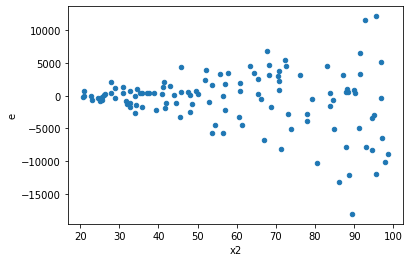

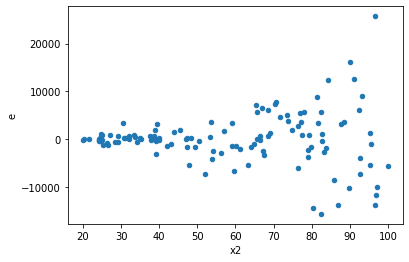

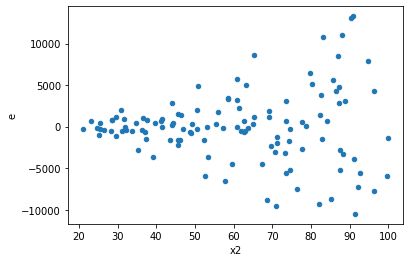

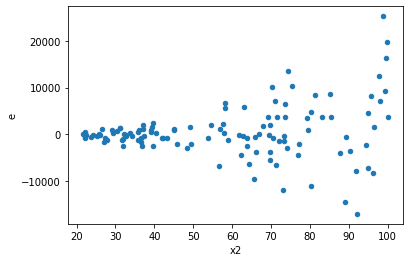

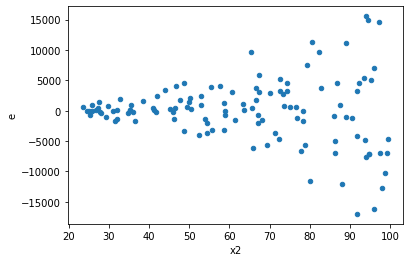

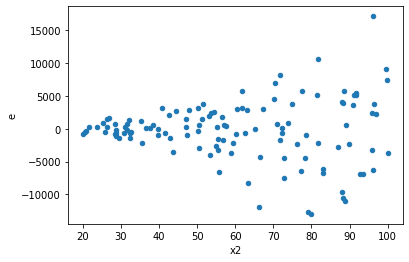

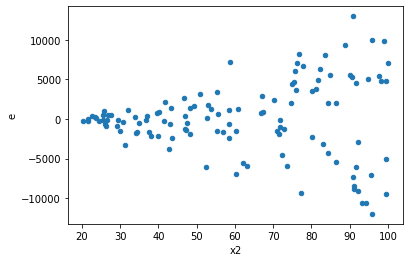

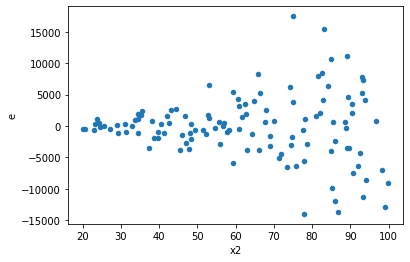

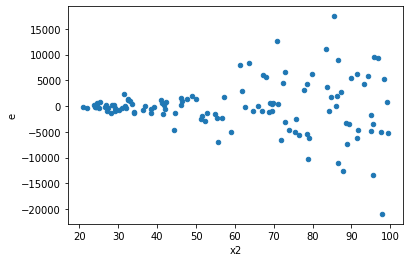

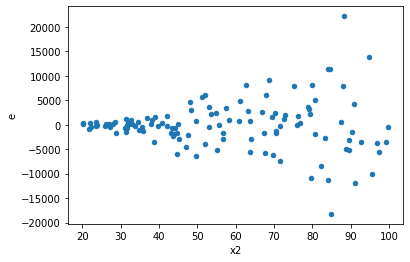

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,44.0,44.0,574155785.1717222,1139295386.5492864,13048995.11753914,25893076.967029236,1.9842966246670122,0.02519042531347493,0.9874047873432625,0.012595212656737464,Reject001=1 : Homoscedasticity
3.0,44.0,44.0,287952708.83937204,2707248501.1755376,6544379.7463493645,61528375.02671676,9.401712218952298,1.1717737891103752e-11,0.9999999999941411,5.858868945551876e-12,Reject001=0 : Heteroscedasticity
5.0,44.0,44.0,760498036.5047764,1006815670.996589,17284046.28419946,22882174.340831567,1.3238899019698727,0.3555979033695831,0.8222010483152085,0.17779895168479154,Reject001=1 : Homoscedasticity
6.0,44.0,44.0,576044328.029336,1509775950.1248188,13091916.546121271,34313089.77556407,2.6209370992156202,0.0018118196713539092,0.999094090164323,0.0009059098356769546,Reject001=0 : Heteroscedasticity
9.0,44.0,44.0,586281439.3007092,618302222.0933198,13324578.16592521,14052323.229393631,1.0546167431648588,0.8607966742100821,0.569601662894959,0.43039833710504105,Reject001=1 : Homoscedasticity
12.0,44.0,44.0,212920969.58348846,2321603004.080193,4839112.945079283,52763704.63818621,10.903590231726186,7.862599460395359e-13,0.9999999999996069,3.9312997301976793e-13,Reject001=0 : Heteroscedasticity
13.0,44.0,44.0,629535871.8781536,888801461.5530801,14307633.451776218,20200033.217115458,1.4118360863240964,0.25653873100888736,0.8717306344955563,0.12826936550444368,Reject001=1 : Homoscedasticity
16.0,44.0,44.0,988334164.1561328,1013254889.9299101,22462140.094457563,23028520.225679774,1.0252148784060857,0.9345493854830509,0.5327253072584746,0.46727469274152544,Reject001=1 : Homoscedasticity
19.0,44.0,44.0,128033564.70158803,1660355017.4891534,2909853.7432179097,37735341.30657167,12.968123018046063,3.042011087472929e-14,0.9999999999999848,1.5210055437364645e-14,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,1853280704.9151468,117392378.15375876,42120016.020798795,2668008.5944036082,0.06334300996196558,6.905807693126056e-16,Reject001=0 : Heteroscedasticity
1.0,44.0,44.0,1137426229.0345016,1064480873.6243951,25850596.11442049,24192747.127827164,0.9358680558368822,0.8269903138481748,Reject001=1 : Homoscedasticity
2.0,44.0,44.0,574155785.1717222,1139295386.5492864,13048995.11753914,25893076.967029236,1.9842966246670122,0.02519042531347493,Reject001=1 : Homoscedasticity
3.0,44.0,44.0,287952708.83937204,2707248501.1755376,6544379.7463493645,61528375.02671676,9.401712218952298,1.1717737891103752e-11,Reject001=0 : Heteroscedasticity
4.0,44.0,44.0,2096017562.7755446,357973944.15720606,47636762.79035329,8135771.4581183195,0.17078766443310583,3.672342250316254e-08,Reject001=0 : Heteroscedasticity
5.0,44.0,44.0,760498036.5047764,1006815670.996589,17284046.28419946,22882174.340831567,1.3238899019698727,0.3555979033695831,Reject001=1 : Homoscedasticity
6.0,44.0,44.0,576044328.029336,1509775950.1248188,13091916.546121271,34313089.77556407,2.6209370992156202,0.0018118196713539092,Reject001=0 : Heteroscedasticity
7.0,44.0,44.0,1082011587.5838175,692584713.0293977,24591172.445086762,15740561.659759039,0.6400899223047802,0.14283395844096844,Reject001=1 : Homoscedasticity
8.0,44.0,44.0,1002147601.64991,776889896.0624909,22776081.855679773,17656588.546874795,0.7752250215272076,0.40174321168539584,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    576
Reject001=1 : Homoscedasticity      424
Name: Result_test, dtype: int64